In [88]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from FactorAnalyzer import FactorAnalyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


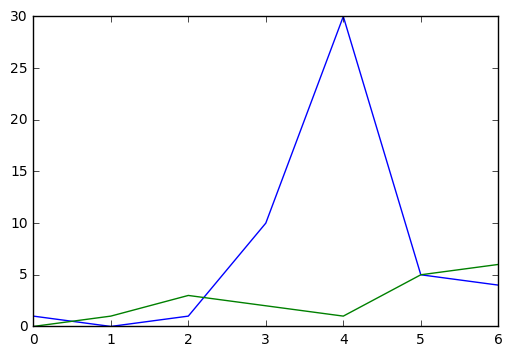

In [172]:
dist = stats.norm

n = 10**5
k = 2
p = 7

Z = dist.rvs(size=n*k).reshape(-1,2)

#L = np.random.rand(10,2)
#L = np.arange(20).reshape(10,2)
if False:
    L = np.ones((1,2)) * np.linspace(1,10, p)[:,None]
    L[:,1] *= L[:,1]
    L[:,0] = 40
else:
    L = np.array([[1, 0],
                 [0, 1],
                 [1, 3],
                 [10,2],
                 [30, 1],
                 [5, 5],
                 [4, 6]])
    
Nu = dist.rvs(size=n * p).reshape(-1,p)
Psi_diag = np.ones(p) * .002
Nu = Nu * Psi_diag

X = (L @ Z.T).T + Nu

plt.plot(L[:,0])
plt.plot(L[:,1])


cycle 1, log-likelihood -116323833374404.7
cycle 2, log-likelihood -116315690950372.72
cycle 3, log-likelihood -116315690950372.72
cycle 4, log-likelihood -116315690950372.72
cycle 5, log-likelihood -116315690950372.72
cycle 6, log-likelihood -116315690950372.72
cycle 7, log-likelihood -116315690950371.9
cycle 8, log-likelihood -116315690950357.44
cycle 9, log-likelihood -116315690949982.62
cycle 10, log-likelihood -116315690940531.1
cycle 11, log-likelihood -116315690701823.88
cycle 12, log-likelihood -116315684673150.81
cycle 13, log-likelihood -116315532416276.05
cycle 14, log-likelihood -116311687184279.84
cycle 15, log-likelihood -116214630144767.16
cycle 16, log-likelihood -113798786169846.03
cycle 17, log-likelihood -69982807031219.89
cycle 18, log-likelihood -1318602014298.8892
cycle 19, log-likelihood -39666649556.61766
cycle 20, log-likelihood -7730819230.4413805
cycle 21, log-likelihood -2484351434.198493
cycle 22, log-likelihood -945312233.9079258
cycle 23, log-likelihood -

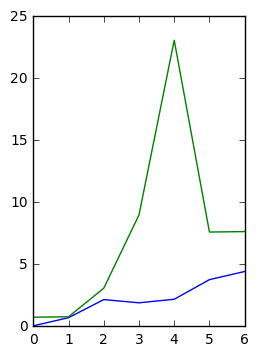

In [173]:
model = FactorAnalyzer(2)
Lp, P = model.fit(X, iters=100, tol=10**10, verbose=True)

if False:
    plt.subplot(1,2,1)
    plt.semilogy(Lp.T[0,:])
    plt.semilogy(Lp.sum(1))

plt.subplot(1,2,2)
plt.plot(Lp.T[0,:])
plt.plot(Lp.sum(1))

print(np.diag(P))

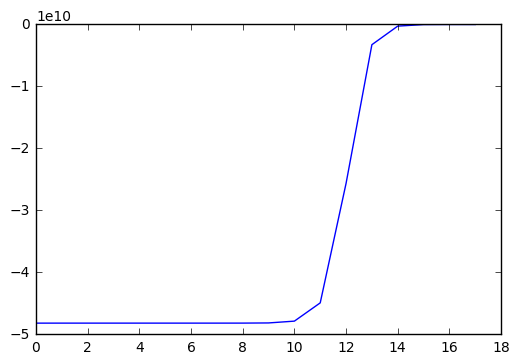

In [170]:
plt.plot(model.LL)

[  3.99775489e-06   3.99849368e-06   4.01711862e-06   3.84577153e-06
   5.77877893e-06   4.03729814e-06   3.92246078e-06]


(<matplotlib.figure.Figure at 0x7fdad9284588>,
 [<matplotlib.lines.Line2D at 0x7fdad8500438>])

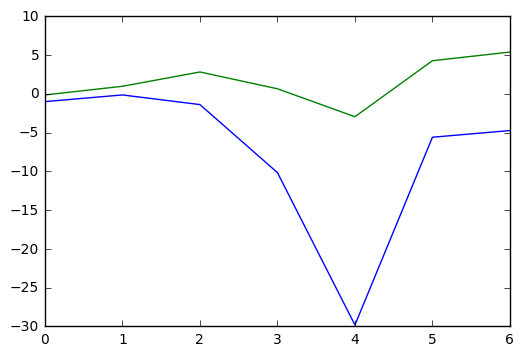

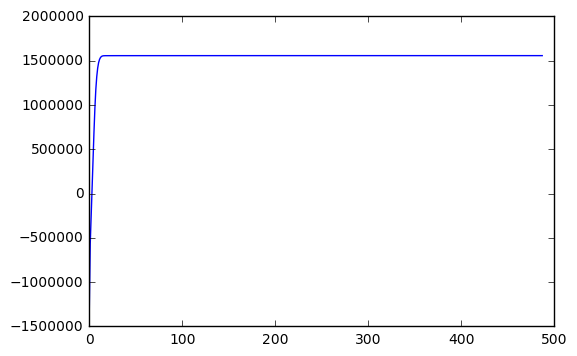

In [174]:
from sklearn.decomposition import FactorAnalysis as FA
model = FA(n_components=2)
model.fit(X)
#print(model.components_.T)
print(model.noise_variance_)

Lm = model.components_
LLm = model.loglike_
plt.plot(Lm[0])
plt.plot(Lm[1])

plt.figure(2), plt.plot(LLm)